In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Probabilidad

Como hemos visto hasta ahora la probabilidad es importante para entender tanto de forma teórica como intuitiva el aprendizaje de máquina (o Machine Learning). 

Hay varias interpretaciones de una probabilidad, una es la clásica que dice que la probabilidad de un evento es el numero de veces que pasa el evento entre el total de resultados de eventos. 

$$P(Evento\, A) = \frac{Evento\, A}{Todos\, los\, posibles\, eventos}$$


Por ejemplo, la probabilidad de obterner 3 al lanzar un dado es 1 dividido por 6, por que hay 6 posibles resultados y solomante una forma de sacar 3. El problema con esta interpretación es que solamente pueden calcularse probabilidades para eventos finitos. No podrias calcular la probabilidad de tener cierta altura o estar en cierto rango de edades. 



### Interpretación Frequentista

Otra interpretación es la frequentista en la que la probabilidad es un limite de la fracción de ocurrencias del evento entre el total de pruebas:

$$P(Evento A) = lim_{N->+\infty} \frac {n_A}{N}$$ 

donde $N$ es el numero de pruebas y $n_A$ es el número de veces. Podemos ilustrar esto con código en Python, usando la librería random que nos permite crear números aleatorios:

In [129]:
import random as rand

Vamos a ver como la interpretación frequentista nos permitiría estimar la probabilidad que una moneda al ser lanzada caiga como decimos, cara o corona. Primero, creamos la función moneda que simula el lanzamiento de una moneda, que retorna 0 si la moneda es 'cara' y 1 si es 'corona'. 

In [137]:
def moneda():
    if rand.random()>0.5:
        return 1
    else: 
        return 0

moneda()

1

In [138]:
def experimento(iteraciones):
    N=0
    na=0
    for i in range(iteraciones):
        N = N + 1
        na = na+moneda()
    return float(na)/float(N)

Creamos un experimento y ademas creamos una lista de experimentos para que veamos la variación de los resultados de cada experimento.

In [140]:
def Experimentos(lim):
    lista_experimentos = []
    for i in range(5):
        lista_experimentos.append(experimento(lim))
    return lista_experimentos

Vemos que entre más experimentos corramos (N tiende a infinito) más nos acercamos a la predicción clásica de la probabilidad que una moneda caiga cara. 

In [142]:
# N=10
print(Experimentos(10))

# N=100
print(Experimentos(100))

# N=1000
print(Experimentos(1000))
 
# N = 10000
print(Experimentos(10000))

[0.4, 0.5, 0.5, 0.5, 0.4]
[0.46, 0.54, 0.54, 0.55, 0.51]
[0.512, 0.499, 0.478, 0.499, 0.51]
[0.5024, 0.4998, 0.5007, 0.5039, 0.5073]


### Interpretación Bayesiana

Por último la interpretación Bayesiana tiene que ver con un grado de creencia o certeza. Por ejemplo, algo imposible ocurre con probabilidad 0 y algo absolutamente cierto pasa con probabilidad 1. Todo lo demás tiene un número entre 0 y 1 dependiendo del grado de certeza que creamos que tenga. 

A medida que vemos más información nuestras creencias sobre la probabilidad que un evento ocurra o sea cierto cambia. Y siempre debemos comenzar con un prior de creencia sobre un evento. 

En la literatura de Machine Learning es esta la interpretación de probabilidad que tiene mayor aceptación porque se hace mucho uso del teorema de Bayes que veremos más abajo. 

## Axiomas de Probabilidad

Definimos como S al universo de eventos posibles y A es un evento en S. Además definimos P como una función de una '$\sigma -algebra $ ' de S. Entonces, para que una función de probabilidad sea llamada así esta debe cumplir con estas caracterisitcas: 

$1.\quad 0\leq P(A)\leq 1$ 

$2.\quad P(S)=1$ 

Si $A_1$, $A_2$ .. son eventos mutuamente excluyentes entonces:

$3.\quad P(A_1 \, U \, A_2 \, U ... U \, A_n)=\sum_{i=0}^{n} P(A_i)$

## Teorema de Bayes

Un concepto importante para entender como funcionan algunos de los modelo de probabilidad que usamos en Machine Learning es el del teorema de Bayes:

$$ P (A|B) = \frac{P(B|A)P(A)}{P(B)}$$

donde $ P(A|B) $ es la probabilidad condicionada del evento $A$ dado que $B$ ocurra. 

Podemos aplicar el teorema al estudio de datos y nos servirá para medir la incertidumbre que tenemos sobre un modelo.

asumiendo que tenemos un vector de parametros para un modelo $\mathbf{w}$ y un conjunto de datos observados D. 

Entonces la probabilidad de que los parametros que describan el fenomeno observado dados los datos podemos escribirlo como $P(\mathbf{w}|D)$ y usando el teorema de Bayes podemos reesbribir esta probabilidad como:

$$ P(\mathbf{w}|D) = \frac{P(D|\mathbf{w}) P(\mathbf{w})}{P(D)} $$

Es decir que la distribución de los parametros condicionada por los datos observados es proporcional a la probabilidad de observar esos datos dados esos parámetros y la constante de proporcionalidad es la creencia previa que teníamos sobre como se distribuyen realmente los parametros. 

La distribución de los datos puede ser vista como un término normalizador que 

### Probabilidad Total

Si ${B_1, B_2, ... , B_n}$ es una partición del espacio muestral, entonces podemos escribir la probabilidad de que el evento $A$ suceda en las probabilidades condicionadas sobre los elementod de la particición:

$$P(A) = \sum_{i} P(A|B_i)P(B_i)$$

Ejemplo: Imaginese que se hacen un examen médico para diagnosticar algún tipo de cancer, y que la probabilidad de que el examen sea positivo dado que el paciente está realmente enfermo es del 80%. 

Ahora si un doctor le dijera a un paciente que el examen resultó dar positivo, ¿debería el paciente preocuparse? 

Respuesta: No, necesariamente. 
    
La razón es por que no ha tomado en cuenta la propabilidad base de que esté enfermo. Supongamos que la probabilidad de tener la enfermedad para la cual el paciente da positivo es 0.014. 

Entonces si $x=1$ es el evento que el examen de positivo, y $y=1$ si el paciente padece la enfermendad. Entonces la probabilidad que el paciente este enfermo es, dado que el examen da positivo es: 

$P(y=1 | x=1)  = \dfrac{P(x=1 | y=1 )*P(y=1)}{P(x=1)}$

Pero, por la ley de probabilidad total,  podemos escribir $P(x=1)= P(x=1 | y=1)* P(y=1) + P(x=1|y=0)* P(y=0)$

In [143]:
P = (0.8)*0.014 /((0.8*0.014)+(0.10*0.986))
P

0.10200364298724955

## Variables Aleatorias



### Variables Discretas

Una variable aleatoria discreta toma valores solamente en un conjunto finito o contablemente finito $\chi$. Denotamos la probabilidad que el evento $X=x$ por $p(X=x)$, o de manera abreviada $p(x)$.

Donde $p()$ es llamada una funcion de probabilidad o fmp. La cual tinene las propiedades $0 \leq p(x) \leq 1$ y $\sum_{x \in X} p(x)=1$.

Los gráficos siguentes muestran dos fmp definidas sobre el espacio muestral  $X = {1, 2, 3, 4, 5}$. La primera es una distribucion uniforme, $p(x)=1/5$, la segunda, es una distribucion degenerada, $p(x) = I(x = 1)$, donde $I()$ es la variable indicador. Esta distribución inidica que X siempre es igual al valor 1, es decir, es una constante.

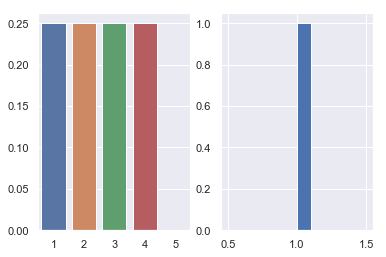

In [59]:
x = [1, 2, 3, 4 , 5]
z = [0.25,0.25,0.25,0.25 , 0]
y = [1]
plt.subplot(1, 2, 1)
sns.barplot(x,z)
plt.subplot(1, 2, 2)
plt.hist(y)
plt.show()

### Distribución Binomial

Suponga que lanza una moneda $n$ veces. Sea $X$ el número de caras. Si la probabilidad de lanzar caras es $p$, entonces decimos que $X$ tiene una distribución binomial:

$$Bin(k|n, p) = {n \choose k} p^k (1-p)^{n-k}$$

Si lanzamos la moneda 1 sola vez, la distribución es llamada Bernoulli.

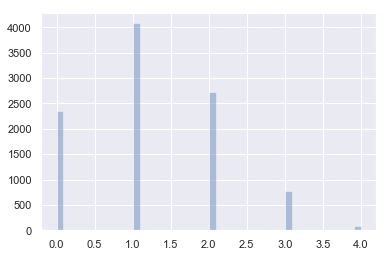

In [146]:
def Binomial(j,p):
    bin=[]
    for i in range(10000):
        bin.append(np.random.binomial(j, p))
    return bin

        
        
sns.set()
sns.distplot(Binomial(4,0.3), kde=False)

### Distribución Poisson

Decimos que $X$ tiene una distribución de Poisson con parámetros $\lambda >0$ si $$ Poi(x|\lambda ) = e^{-\lambda} \frac{\lambda^x}{x!}$$

El primer término es una constante normalizadora, necesaria para que la distribución sume a 1. La distribución de Poisson es usada para modelar eventos raros como decaimiento radioactivo o accidentes de transito.

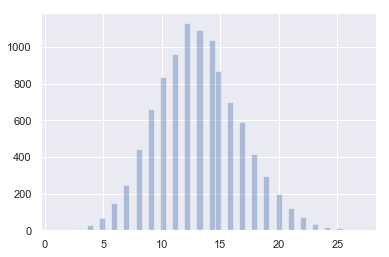

In [147]:
def Poisson(l):
    poi=[]
    for i in range(10000):
        poi.append(np.random.poisson(l))
    return poi

        
        
sns.set()
sns.distplot(Poisson(13), kde=False)   

## Variables continuas

Las variables aleatorias continuas pueden tomar valores en un conjunto infinito. No tienen funciones de masa sino de densidad dadas por:

$$p(a \leq X \leq b) = p(b)-p(a)$$

donde $p(b)=p(X\leq b )$ es la distribución acumulada. Ahora si definimos $F(x)=p(X\leq x )$, la derivada con despecto a $x$ la llamamos la función densidad de probabilidad. Dada una función $f(x)=F'(x)$, podemos decir que:

$$P(a \leq X \leq b) = \int_a^b f(x)dx$$

### Distribución Uniforme

Una distribución uniforme es tal que 

$$Unif(x|a, b) = \frac{1}{b-a} I(a\leq x \leq b)$$

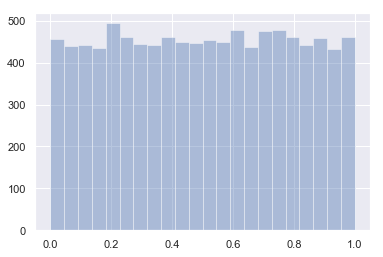

In [126]:
uniform=[]
for i in range(10000):
    uniform.append(np.random.rand())
unif = np.array(uniform)

sns.set()
sns.distplot(unif, kde=False)

### Distribución Normal

La distribución más usada en machine learning es la Normal. Su función de densidad está dada por 

$$ N(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-1}{2\sigma^2} (x-\mu)^2}$$

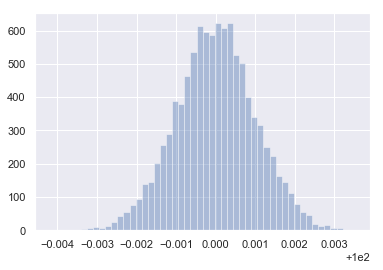

In [151]:
normal=[]
for i in range(10000):
    normal.append(np.random.normal(100, 0.001))

sns.set()
sns.distplot(normal, kde=False)

### Distribución Normal Estandar

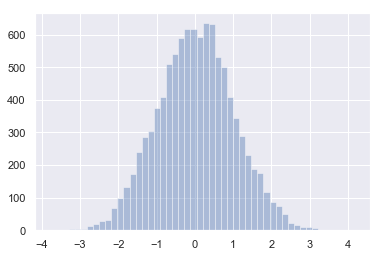

In [152]:
normal=[]
for i in range(10000):
    normal.append(np.random.randn())

sns.set()
sns.distplot(normal, kde=False)

## Valor Esperado y Varianza

El valor esperado para una variable discreta $X$ está definido como
$$E[X] = \sum_{x \in X} x p(x)$$

Mientras que para una variable continua $X$ está definido como :
$$E[X]= \int_X xp(x)dx$$ 

Y la varianza de $X$ está definida como el valor esperado de la distancia de cada valor de X al promedio $\mu=E[X]$

$$Var(X)=E [(X − μ)^2] = E[X^2]-E[X]^2$$


Y la desviación estandar es simplemente: $std(X) = \sqrt{Var(X)}$